### Bu ödevde kullanılan algorotmaların çok büyük bir kısmı UHEM üzerindeki bilgisayarlar kullanılarak hesaplanmıştır. Bu sayede hem çok daha hızlı çıktılar elde edilmiş(kendi bilgisayarımda çıktı elde edemiyordum) hem de aynı anda birçok modelin eş zamanlı olarak denenmesi mümkün olmuştur. n_jobs=-1 ayarlanarak bütün işlemcilerin gücünden faydalanmak mümkün kılınmıştır. Açık ara en uzun süren algoritma Lineer Regresyon olarak karşımıza çıkmaktadır. 

In [2]:
import numpy as np
from scipy.io import loadmat
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.preprocessing import MinMaxScaler

from scipy.stats import chisquare

import matplotlib.pyplot as plt

import seaborn as sns
import math

# HW3

In this homework we are going to look at a hyperspectral image dataset called [Salinas](https://rslab.ut.ac.ir/data) dataset.

In [41]:
salinas = loadmat('data/Salinas_corrected.mat')['salinas_corrected']
salinas.shape

(512, 217, 204)

In [42]:
salinas_gt = loadmat('data/Salinas_gt.mat')['salinas_gt']
salinas_gt.shape
x = np.reshape(salinas, (512*217,204))
gt = np.reshape(salinas_gt, (512*217))

## Q1 

1. Reshape and split the data into train (80%) and test (20%) data sets.
2. Apply all of the supervised ML algorithms we learned on the data and compare the results.

In [7]:
x_train, x_test, gt_train, gt_test = train_test_split(x,gt,test_size=0.2)

## LOGISTIC REGRESSION

#### Algoritmalarda kullanılan solver parametreleri, veri setinin boyutuna ve tipine göre, bu veri setini çözmeye uygun adaylar olarak belirlenmiş ve bu bağlamda tercih edilmiştir. Bazı parametreler(tol, C etc...) modellerin daha hızlı çalışması için tercih edilmiştir. 

#### Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm

In [ ]:
modelLRncg = LogisticRegression(C = 10, 
                           tol = 1e-1,
                            penalty = "l2",
                            solver = "lbfgs",
                            multi_class = "ovr",
                            max_iter = 10000,
                            n_jobs = -1)

modelLRncg.fit(x_train, gt_train)
predictedLRncg = modelLRncg.predict(x_test)
output = accuracy_score(predictedLRncg, gt_test)
cnf = confusion_matrix(predictedLRncg, gt_test)

cnf = cnf.reshape(1,cnf.size)
cnf =  np.append(cnf, output)

a_file = open("LRlbfgs.txt", "w")
np.savetxt(a_file, cnf)
a_file.close()

In [20]:
LRlbresults = np.loadtxt("/Users/asuhe/Desktop/supercomputing/Results/LogisticRegression/LogisticRegressionLbgfsResult.txt")
accLRlb = LRlbresults[len(LRlbresults)-1]
cmLRlb = np.delete(LRlbresults, len(LRlbresults)-1)
cmLRlb = cmLRlb.reshape(int(math.sqrt(cmLRlb.size)),int(math.sqrt(cmLRlb.size)))
LRlbpredicted = np.loadtxt("/Users/asuhe/Desktop/supercomputing/Results/LogisticRegression/LRlbfgspredicted.txt")
LRlbpredicted = LRlbpredicted.reshape(512,217)

In [21]:
accLRlb

0.8686377750776293

In [22]:
chisquare(cmLRlb, axis=None)

Power_divergenceResult(statistic=1465657.9459970302, pvalue=0.0)

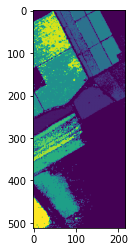

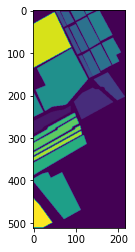

In [78]:
plt.imshow(LRlbpredicted)
plt.show()
plt.imshow(salinas_gt)

#### NEWTON-CG

In [ ]:
modelLRncg = LogisticRegression(C = 10, 
                           tol = 1e-1,
                            penalty = "l2",
                            solver = "newton-cg",
                            multi_class = "ovr",
                            max_iter = 10000,
                            n_jobs = -1)

modelLRncg.fit(x_train, gt_train)
predictedLRncg = modelLRncg.predict(x_test)
output = accuracy_score(predictedLRncg, gt_test)
cnf = confusion_matrix(predictedLRncg, gt_test)

cnf = cnf.reshape(1,cnf.size)
cnf =  np.append(cnf, output)

a_file = open("LRncg.txt", "w")
np.savetxt(a_file, cnf)
a_file.close()

In [23]:
LRncgresults = np.loadtxt("/Users/asuhe/Desktop/supercomputing/Results/LogisticRegression/LogisticRegressionNCGResult.txt")
accLRncg = LRncgresults[len(LRncgresults)-1]
cmLRncg = np.delete(LRncgresults, len(LRncgresults)-1)
cmLRncg = cmLRncg.reshape(int(math.sqrt(cmLRncg.size)), int(math.sqrt(cmLRncg.size)))
LRncgpredicted = np.loadtxt("/Users/asuhe/Desktop/supercomputing/Results/LogisticRegression/LRncgpredicted.txt")
LRncgpredicted = LRncgpredicted.reshape(512,217)

In [24]:
accLRncg

0.8716979433868863

In [25]:
chisquare(cmLRncg, axis=None)

Power_divergenceResult(statistic=1476894.884028622, pvalue=0.0)

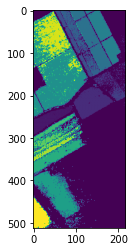

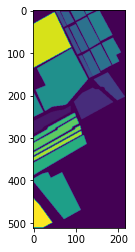

In [81]:
plt.imshow(LRncgpredicted)
plt.show()
plt.imshow(salinas_gt)

#### SAG

In [ ]:
modelLRncg = LogisticRegression(C = 10, 
                           tol = 1e-1,
                            penalty = "l2",
                            solver = "sag",
                            multi_class = "ovr",
                            max_iter = 10000,
                            n_jobs = -1)

modelLRncg.fit(x_train, gt_train)
predictedLRncg = modelLRncg.predict(x_test)
output = accuracy_score(predictedLRncg, gt_test)
cnf = confusion_matrix(predictedLRncg, gt_test)

cnf = cnf.reshape(1,cnf.size)
cnf =  np.append(cnf, output)

a_file = open("LRsag.txt", "w")
np.savetxt(a_file, cnf)
a_file.close()

In [26]:
LRsagresults = np.loadtxt("/Users/asuhe/Desktop/supercomputing/Results/LogisticRegression/LogisticRegressionSagResult.txt")
accLRsag = LRsagresults[len(LRsagresults)-1]
cmLRsag = np.delete(LRsagresults, len(LRsagresults)-1)
cmLRsag = cmLRsag.reshape(int(math.sqrt(cmLRsag.size)), int(math.sqrt(cmLRsag.size)))
LRsagpredicted = np.loadtxt("/Users/asuhe/Desktop/supercomputing/Results/LogisticRegression/LRsagpredicted.txt")
LRsagpredicted = LRsagpredicted.reshape(512,217)

In [27]:
accLRsag

0.7136492507087889

In [28]:
chisquare(cmLRsag, axis=None)

Power_divergenceResult(statistic=1571273.90054453, pvalue=0.0)

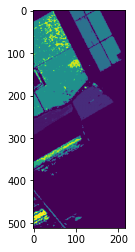

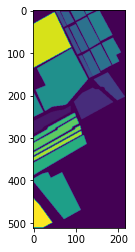

In [82]:
plt.imshow(LRsagpredicted)
plt.show()
plt.imshow(salinas_gt)

#### Ref: https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions

## SVM

#### LINEAR

In [ ]:
modelSVCrbf = SVC(C=5,
             kernel='linear',
             max_iter=50000)


modelSVCrbf.fit(x_train,gt_train)

predictedSVCrbf = modelSVCrbf.predict(x_test)
output = accuracy_score(predictedSVCrbf, gt_test)
cnf = confusion_matrix(predictedSVCrbf, gt_test)


cnf = cnf.reshape(1,cnf.size)
cnf =  np.append(cnf, output)

a_file = open("SVClinear.txt", "w")
np.savetxt(a_file, cnf)
a_file.close()

In [29]:
SVMlinear = np.loadtxt("/Users/asuhe/Desktop/supercomputing/Results/SVM/SVClinear.txt")
accSVMlinear = SVMlinear[len(SVMlinear)-1]
cmSVMlinear = np.delete(SVMlinear, len(SVMlinear)-1)
cmSVMlinear = cmSVMlinear.reshape(int(math.sqrt(cmSVMlinear.size)),int(math.sqrt(cmSVMlinear.size)))
SVMlinearpredicted = np.loadtxt("/Users/asuhe/Desktop/supercomputing/Results/SVM/SVClinearpredicted.txt")
SVMlinearpredicted = SVMlinearpredicted.reshape(512,217)

In [30]:
accSVMlinear

0.45484001620089104

In [31]:
chisquare(cmSVMlinear, axis=None)

Power_divergenceResult(statistic=315209.53962467937, pvalue=0.0)

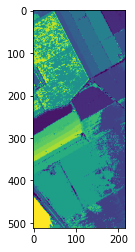

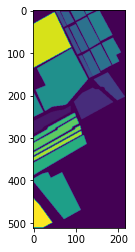

In [83]:
plt.imshow(SVMlinearpredicted)
plt.show()
plt.imshow(salinas_gt)

#### RBF

In [ ]:
modelSVCrbf = SVC(C=5,
             kernel='rbf',
             max_iter=50000)


modelSVCrbf.fit(x_train,gt_train)

predictedSVCrbf = modelSVCrbf.predict(x_test)
output = accuracy_score(predictedSVCrbf, gt_test)
cnf = confusion_matrix(predictedSVCrbf, gt_test)

cnf = cnf.reshape(1,cnf.size)
cnf =  np.append(cnf, output)

a_file = open("SVCrbfcnf.txt", "w")
np.savetxt(a_file, cnf)
a_file.close()

In [32]:
SVMrbf = np.loadtxt("/Users/asuhe/Desktop/supercomputing/Results/SVM/SVCrbfcnf.txt")
accSVMrbf = SVMrbf[len(SVMrbf)-1]
cmSVMrbf = np.delete(SVMrbf, len(SVMrbf)-1)
cmSVMrbf = cmSVMrbf.reshape(int(math.sqrt(cmSVMrbf.size)),int(math.sqrt(cmSVMrbf.size)))
SVMrbfpredicted = np.loadtxt("/Users/asuhe/Desktop/supercomputing/Results/SVM/SVCrbfcnfpredicted.txt")
SVMrbfpredicted = SVMrbfpredicted.reshape(512,217)

In [33]:
accSVMrbf

0.8513118221502183

In [34]:
chisquare(cmSVMrbf, axis=None)

Power_divergenceResult(statistic=1452841.151703344, pvalue=0.0)

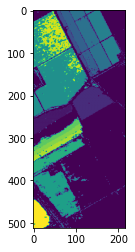

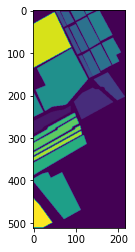

In [84]:
plt.imshow(SVMrbfpredicted)
plt.show()
plt.imshow(salinas_gt)

## LDA

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [35]:
modelLDA = LDA(n_components=16) #n_classes - 1
data = modelLDA.fit_transform(x_train, gt_train)
predictedLDA = modelLDA.predict(x_test)
cmLDA = confusion_matrix(gt_test,predictedLDA)

In [36]:
print(accuracy_score(predictedLDA, gt_test))
print(chisquare(cmLDA,axis=None))
print(modelLDA.explained_variance_ratio_)

0.8065343593897665
Power_divergenceResult(statistic=1027252.2161918906, pvalue=0.0)
[0.32862459 0.18661622 0.15165477 0.08858052 0.06855899 0.04096444
 0.03662195 0.03022429 0.02091467 0.01685145 0.01371207 0.00623392
 0.00466697 0.00293348 0.00196574 0.00087593]


In [88]:
predictedLDAall = modelLDA.predict(x)
predictedLDAall = predictedLDAall.reshape(512,217)

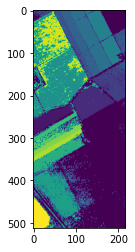

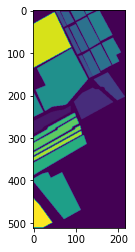

In [89]:
plt.imshow(predictedLDAall)
plt.show()
plt.imshow(salinas_gt)

##### explained variance 7 parametre ile 0.97'ye ulaşıyor

## KNN

In [ ]:
arr = np.arange(3,30)
cnf = np.array([])
for n in arr:
    modelKNN = KNeighborsClassifier(n_neighbors=n, n_jobs = -1)
    modelKNN.fit(x_train,gt_train)
    predictedKNN = modelKNN.predict(x_test)

    cm = confusion_matrix(gt_test,predictedKNN)
    ms = modelKNN.score(x_test, gt_test)
    cs = chisquare(cm,axis=None)
    cnf =  np.append(cnf, ms)
    cnf =  np.append(cnf, cs[0])
    
a_file = open("KNNresults.txt", "w")
np.savetxt(a_file, cnf)
a_file.close()

In [3]:
KNNs = np.loadtxt("/Users/asuhe/Desktop/supercomputing/Results/KNN/KNNresults.txt")
KNNres = KNNs.reshape(int((KNNs.size)/2), 2)

In [23]:
print(np.argmax(KNNres, axis=0))

[2 1]


In [33]:
KNNres[2,0]

0.9069798838936142

In [32]:
counter = 0;
for i in KNNres[:,0]:
    if i >= 0.90:
        counter = counter + 1
    else:
        break;

print(counter)

21


##### Burada görüldüğü üzere, KNN 21. K değerine kadar %90 üzerinde bir skor değeri veriyor. Bununla beraber karmaşıklık matrisinin ki-kare değerleri arasında anlamlı bir farklılık gözükmüyor. 

# Q2

Now, apply all of the unsupervised algorithms we have learned so far and compare the results. In order to align the unsupervised labels and true labels use the `linear_sum_assignment` function from `scipy.optimize`. For example, if a confusion matrix looks like:

In [100]:
from scipy.optimize import linear_sum_assignment

In [30]:
cm = np.array(
      [[1,10,2],
       [9,2,1],
       [3,4,10]])

we get

In [32]:
rows, cols = linear_sum_assignment(cm,maximize=True)
cm = cm[rows,:]
cm = cm[:,cols]
cm

array([[10,  1,  2],
       [ 2,  9,  1],
       [ 4,  3, 10]])

## K-MEANS

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k = len(np.unique(gt))
kmeans = KMeans(n_clusters=k)
predictedkmeans = kmeans.fit_predict(x)
cm = confusion_matrix(gt,predictedkmeans)
cnf = np.reshape(cnf, (1, cnf.size))
cnf = np.append(cnf, accuracy_score(gt, predictedkmeans))
predict = predictedkmeans.reshape(1,predictedkmeans.size)


a_file = open("Kmeansresults.txt","w")
np.savetxt(a_file, cnf)
a_file.close()

o_file = open("Kmeansdata.txt", "w")
np.savetxt(o_file, predict)
o_file.close()

In [103]:
Kmeansres = np.loadtxt("/Users/asuhe/Desktop/supercomputing/Results/KMEANS/Kmeansresults.txt")
accKmeans = Kmeansres[len(Kmeansres)-1]
cmKmeans = np.delete(Kmeansres, len(Kmeansres)-1)
cmKmeans = cmKmeans.reshape(int(math.sqrt(cmKmeans.size)),int(math.sqrt(cmKmeans.size)))
Kmeanspredictedd = np.loadtxt("/Users/asuhe/Desktop/supercomputing/Results/KMEANS/Kmeansdata.txt")
Kmeanspredicted = Kmeanspredictedd.reshape(512,217)

In [55]:
accKmeans

0.015318980414746544

In [157]:
rowsKmeans, colsKmeans = linear_sum_assignment(cmKmeans,maximize=True)
cmKmeans = cmKmeans[rowsKmeans,:]
cmKmeans = cmKmeans[:,rowsKmeans]

In [158]:
chisquare(cmKmeans, axis=None)

Power_divergenceResult(statistic=1614535.6740711406, pvalue=0.0)

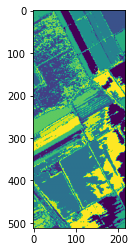

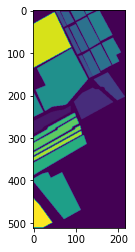

In [90]:
plt.imshow(Kmeanspredicted)
plt.show()
plt.imshow(salinas_gt)

###  <font color='red'>ELBOW METHOD</font>

#### Her ne kadar K-Means değerini doğrudan Groundtruth data setindeki uniqe değerler kadar vermiş olsak da, skor değeri oldukça kötü çıktı. Bu sebeple hangi k değeri için K-Means algoritmasının düzgün ve daha hızlı çalışacağına karar vermek için Elbow metodu mevcut.

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
import pandas
import nltk

In [ ]:
scaler = MinMaxScaler()
data = scaler.fit_transform(x)

In [ ]:
kyellow = KMeans()
output = KElbowVisualizer(kyellow, k=(1,30))
output.fit(data)
output.show(outpath = "kelbowgraph.png")

In [58]:
from IPython.display import Image
from IPython.core.display import HTML

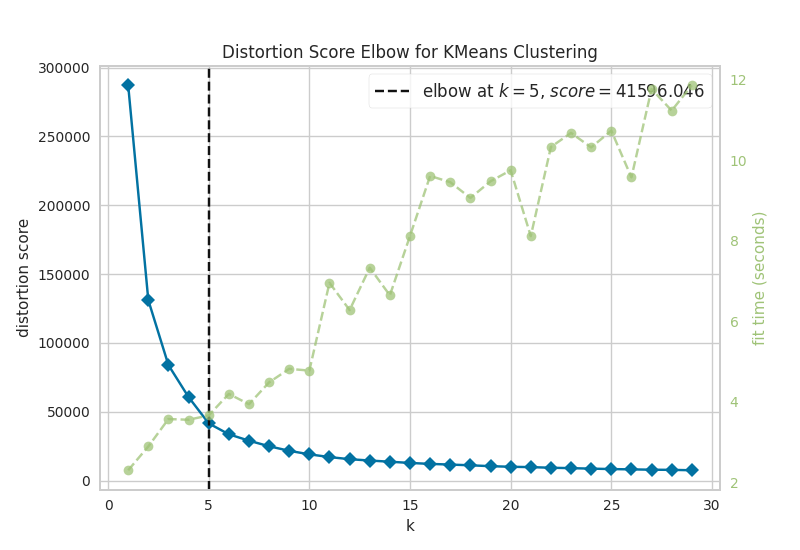

In [59]:
Image(filename = "/Users/asuhe/Desktop/supercomputing/Results/KMEANS/kelbowgraph.png", width=800, height=800)

##### Buradaki sonuçtan belli olacağı üzere, k=5 değeri için K-Means için optimum.

In [140]:
# k=5 için yapılmış algoritmaya bakalım.

Kmeansres5 = np.loadtxt("/Users/asuhe/Desktop/supercomputing/Results/KMEANS/Kmeansresults5.txt")
accKmeans5 = Kmeansres5[len(Kmeansres5)-1]
cmKmeans5 = np.delete(Kmeansres5, len(Kmeansres5)-1)
cmKmeans5 = cmKmeans5.reshape(int(math.sqrt(cmKmeans5.size)),int(math.sqrt(cmKmeans5.size)))
Kmeanspredictedd5 = np.loadtxt("/Users/asuhe/Desktop/supercomputing/Results/KMEANS/Kmeansdata5.txt")
Kmeanspredicted5 = Kmeanspredictedd5.reshape(512,217)

In [159]:
rowsKmeans5, colsKmeans5 = linear_sum_assignment(cmKmeans5,maximize=True)
cmKmeans5 = cmKmeans5[rowsKmeans5,:]
cmKmeans5 = cmKmeans5[:,rowsKmeans5]

In [160]:
print(accKmeans5)
print(chisquare(cmKmeans5, axis=None))

0.06823336693548387
Power_divergenceResult(statistic=3770881.6277181744, pvalue=0.0)


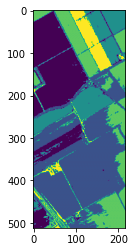

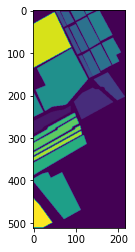

In [147]:
plt.imshow(Kmeanspredicted5)
plt.show()
plt.imshow(salinas_gt)

In [135]:
Kmeanspredictedd5

array([0., 0., 0., ..., 0., 0., 0.])

##### Hala kayda değer hiçbir şey yok. Hem skor hem de ki-kare değeri anlamlı hiçbir yere ulaşmadı. Ama algoritma gerçekten hızlandı :)

## HIERARCHICAL CLUSTERING

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
k = len(np.unique(gt))

affinity= ["euclidean", "l1", "l2", "manhattan", "cosine"]
linkage = ["complete", "average", "single"]
cnf = np.array([])
data = np.array([])

model = AgglomerativeClustering(n_clusters=k, 
                                linkage="ward", 
                                affinity="euclidean") #If linkage is “ward”, only “euclidean” is accepted.
predicted = model.fit_predict(x)
cs = chisquare(confusion_matrix(gt,predicted),axis=None)

cnf = np.append(cnf,cs)
predict = predicted.reshape(1, predicted.size)
data = np.append(data, predict)

for link in linkage:
    for aff in affinity:
        model = AgglomerativeClustering(n_clusters=k, 
                                linkage=link, 
                                affinity=aff)
        predicted = model.fit_predict(x)
        cs = chisquare(confusion_matrix(gt,predicted),axis=None)
        cnf = np.append(cnf,cs)
        predict = predicted.reshape(1, predicted.size)
        data = np.append(data, predict)
        
a_file = open("hierarchicalresults.txt", "w")
np.savetxt(a_file, cnf)
a_file.close()

o_file = open("hierarchicaldata.txt","w")
np.savetxt(o_file, data)
o_file.close()

In [35]:
HC = np.loadtxt("/Users/asuhe/Desktop/supercomputing/Results/HierarchicalClustring/hierarchicalresults.txt")
HCresult = HC.reshape(16,2)
HCpredicted = np.loadtxt("/Users/asuhe/Desktop/supercomputing/Results/HierarchicalClustring/hierarchicaldata.txt")
HCpredicted = HCpredicted.reshape(16, int((HCpredicted.size)/16))

In [90]:
HCaccscores = np.array([])
for i in range(16):
    HCaccscores = np.append(HCaccscores, accuracy_score(HCpredicted[i],gt))

In [91]:
HCaccscores

array([0.06753132, 0.05056524, 0.0796551 , 0.05056524, 0.0796551 ,
       0.42579925, 0.01766813, 0.09834929, 0.01766813, 0.09834929,
       0.00138609, 0.51264581, 0.51261881, 0.51264581, 0.51261881,
       0.5124568 ])

In [88]:
HCresult

array([[1402041.45814732,       0.        ],
       [2434398.86470334,       0.        ],
       [3124934.31082589,       0.        ],
       [2434398.86470334,       0.        ],
       [3124934.31082589,       0.        ],
       [6041887.29610095,       0.        ],
       [5033228.91960685,       0.        ],
       [4868424.61988767,       0.        ],
       [5033228.91960685,       0.        ],
       [4868424.61988767,       0.        ],
       [6182293.45024482,       0.        ],
       [9104037.1858979 ,       0.        ],
       [9103148.33089717,       0.        ],
       [9104037.1858979 ,       0.        ],
       [9103148.33089717,       0.        ],
       [9097816.55870176,       0.        ]])

##### Burada açık bir şekilde gözüküyor ki, son 5 ki-kare değerleri diğerlerinde açık ara çok daha yüksek. Bunu dikkate aldığımızda linkage parametresi sadece single iken çok yüksek ki-kare değerleri veriyorken, affinity parametresi neredeyse etkilemiyor. 

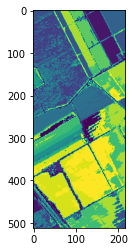

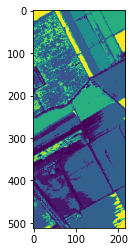

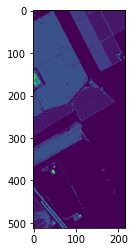

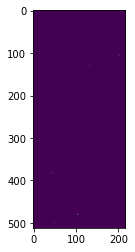

In [143]:
plt.imshow(HCpredicted[0][:].reshape(512,217))
plt.show()
plt.imshow(HCpredicted[2][:].reshape(512,217))
plt.show()
plt.imshow(HCpredicted[5][:].reshape(512,217))
plt.show()
plt.imshow(HCpredicted[11][:].reshape(512,217))
plt.show()

##### Ancak tahmin edilen değerler çizdirildiğinde, bu algoritma için ki-kare değeri ne kadar küçükse, sınıflandırma işleminin de o denli daha doğru olduğu gözüküyor. 

## PRINCIPAL COMPONENT ANALYSIS

##### Burada explained variance ratio değerinin 0.95 üzerinde olabilmesi için kaç bağlı değişkenin, data modelini açıklamak için yeterli olduğunu bulmuş olduk. Ancak bunun yorumlama konusunda hiçbir fikrim yok. Bunu daha iyi kavramam gerekiyor.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
data = scaler.fit_transform(x)

In [ ]:
pca = PCA(n_components= 0.95)
pca.fit(data)
reduces = pca.fit(data)
explained = pca.explained_variance_ratio_

a_file = open("PCA.txt", "w")
np.savetxt(a_file, explained)
a_file.close()

In [148]:
PCA = np.loadtxt("/Users/asuhe/Desktop/supercomputing/Results/PCA/PCA.txt")

In [149]:
PCA

array([0.70269638, 0.26601375])

## DBSCAN

##### Bu algoritmada 2 kritik parametre var. Bir tanesi epsilon değeri, diğeri ise min_samples değeri. Epsilon değeri, iki komşu arasındaki maksimum mesafeyi ifade etmektedir. Ancak öncesinde data normalize edilmeli, ardından bu işlem yapılmalıdır. Daha sonra DBSCAN algoritmasında da normalize datalar ile çalışılmalıdır. Epsilon değerini bulmak için NeareastNeighbors ve KneeLocatar algoritmalarından faydalanabiliriz. 

In [4]:
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors

In [53]:
X = scaler.fit_transform(x)
neighbors = 16  #KNN sonucunda ilk 21 K değeri için benzer sonuçlar gelmiş
#Ancak 16. k değerinde bir lokal maksimum vardı, bu sebeple 16 değerini aldım. 
neighbors = NearestNeighbors(n_neighbors=neighbors).fit(X)
distances, indices = neighbors.kneighbors(X)
distance_arr = sorted(distances[:,6], reverse=True)

In [11]:
kneedle = KneeLocator(range(1,len(distance_arr)+1),  #x values
                      distance_arr, # y values
                      S=1.0, #parameter suggested from paper
                      curve="convex", #parameter from figure
                      direction="decreasing")

In [13]:
kneedle.elbow_y

0.7012902490600694

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
KNNscore = 16  #min_samples parametresinin büyük olması, çalışılan datanın büyüklüğüne göre belirlebebiliyor
#eğer çok küçük seçilirse, datasetteki gürültüleri de classify etmeye çalışıyor. Muhtemelen bu değer de 
#mevcut data için oldukça küçük ama KNN sonuçlarını değerlendirerek almayı tercih ettim.
epsilon = 0.7013
model = DBSCAN(eps=epsilon, min_samples= KNNscore)
model.fit(X)
predicted = model.fit_predict(X)
cnf = confusion_matrix(gt, predicted)

a_file = open("DBSCANconfusionmatrix.txt", "w")
np.savetxt(a_file, cnf)
a_file.close()

o_file = open("DBSCANpredicted.txt","w")
np.savetxt(o_file, predicted)
o_file.close()

In [97]:
DB = np.loadtxt("/Users/asuhe/Desktop/supercomputing/Results/DBSCAN/DBSCANconfusionmatri.txt")
DBresult = DB.reshape(int(DB.shape[0]),int(DB.shape[1]))
DBpredictedd = np.loadtxt("/Users/asuhe/Desktop/supercomputing/Results/DBSCAN/DBSCANpredicte.txt")
DBpredicted = DBpredictedd.reshape(512,217)

In [175]:
rowsDB, colsDB = linear_sum_assignment(DBresult,maximize=True)
cmDB = DBresult
cmDB = cmDB[rowsDB,:]
cmDB = cmDB[:,rowsDB]

In [98]:
accuracy_score(DBpredicted_nonnormalizedd, gt)

0.5120787730414746

In [176]:
chisquare(cmDB, axis=None)

Power_divergenceResult(statistic=10203130.698588707, pvalue=0.0)

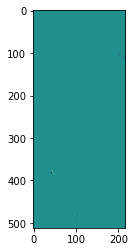

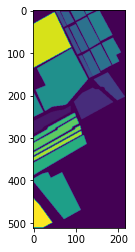

In [155]:
plt.imshow(DBpredicted)
plt.show()
plt.imshow(salinas_gt)

#### Ki-kare değeri oldukça yüksek geldi, ancak görsel olarak hiçbir şey çıkmadı.

In [167]:
neighbors = 16  #KNN sonucunda ilk 21 K değeri için benzer sonuçlar gelmiş
#Ancak 16. k değerinde bir lokal maksimum vardı, bu sebeple 16 değerini aldım. 
neighborsx = NearestNeighbors(n_neighbors=neighbors).fit(x)
distancesx, indicesx = neighborsx.kneighbors(x)
distance_arrx = sorted(distancesx[:,6], reverse=True)

In [168]:
kneedlex = KneeLocator(range(1,len(distance_arrx)+1),  #x values
                      distance_arrx, # y values
                      S=1.0, #parameter suggested from paper
                      curve="convex", #parameter from figure
                      direction="decreasing")

In [169]:
kneedlex.elbow_y

2605.550421695961

In [95]:
DB_nonnormalized = np.loadtxt("/Users/asuhe/Desktop/supercomputing/Results/DBSCAN/DBSCANconfusionmatrixx.txt")
DBresult_nonnormalized = DB_nonnormalized.reshape(int(DB_nonnormalized.shape[0]),int(DB_nonnormalized.shape[1]))
DBpredicted_nonnormalizedd = np.loadtxt("/Users/asuhe/Desktop/supercomputing/Results/DBSCAN/DBSCANpredictedd.txt")
DBpredicted_nonnormalized = DBpredicted_nonnormalizedd.reshape(512,217)

In [101]:
rowsDB_nonnormalized, colsDB_nonnormalized = linear_sum_assignment(DBresult_nonnormalized,maximize=True)
cmDB_nonnormalized = DBresult_nonnormalized
cmDB_nonnormalized = cmDB_nonnormalized[rowsDB_nonnormalized,:]
cmDB_nonnormalized = cmDB_nonnormalized[:,rowsDB_nonnormalized]

In [96]:
accuracy_score(DBpredicted_nonnormalizedd, gt)

0.5120787730414746

In [102]:
chisquare(cmDB_nonnormalized, axis=None)

Power_divergenceResult(statistic=10199152.14516129, pvalue=0.0)

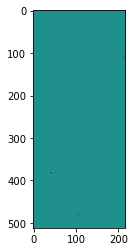

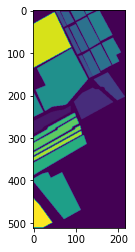

In [94]:
plt.imshow(DBpredicted_nonnormalized)
plt.show()
plt.imshow(salinas_gt)

#### Gördülüğü üzere, dataların normalize olup olmaması algoritmanın ki-kare değerini ve tahminlerini değiştirmedi.

## Q3

Now compare supervised and unsupervised algorithm results.


<table>
<thead>
<tr>
<th>Type</th>
<th>Method</th>
<th>Accuracy Score</th>
<th>Chisquare</th>
</tr>
</thead>
<tbody>
<tr>
<th>SUPERVISED</th>
<th>Logistic Regression - LBFGS</th>
<th>0.868</th>
<th>1465657</th>
</tr>
<tr>
<th>SUPERVISED</th>
<th>Logistic Regression - Newton-Cg</th>
    <th><font color='red'>0.871</font></th>
<th>1476894</th>
</tr>
<tr>
<th>SUPERVISED</th>
<th>Logistic Regression - Sag</th>
<th>0.713 </th>
<th>1571273</th>
</tr>
<tr>
<th>SUPERVISED</th>
<th>SVM - LINEAR</th>
<th>0.454 </th>
<th>315209</th>
</tr>
<tr>
<th>SUPERVISED</th>
<th>SVM - RBF </th>
<th>0.851 </th>
<th>1452841</th>
</tr>
<tr>
<th>SUPERVISED</th>
<th>LDA</th>
<th>0.806 </th>
<th>1027252</th>
</tr>
<tr>
<th>UNSUPERVISED</th>
<th>K-Means(k=17)</th>
<th>0.015 </th>
<th>1614535</th>
</tr>
<tr>
<th>UNSUPERVISED</th>
<th>K-Means(k=5)</th>
<th>0.068 </th>
<th>3770881</th>
</tr>
<tr>
<th>UNSUPERVISED</th>
<th>Hierarchical Clus. - Ward   </th>
<th>0.067 </th>
<th>1402041</th>
</tr>
<tr>
<th>UNSUPERVISED</th>
<th>Hierarchical Clus. - Complete</th>
<th>0.425 </th>
<th>6041887</th>
</tr>
<tr>
<th>UNSUPERVISED</th>
<th>Hierarchical Clus. - Average</th>
<th>0.098 </th>
<th>4868424</th>
</tr>
<tr>
<th>UNSUPERVISED</th>
<th>Hierarchical Clus. - Single</th>
<th>0.512 </th>
<th>9103148</th>
</tr>
<tr>
<th>UNSUPERVISED</th>
<th>DBSCAN - Normalized</th>
<th>0.512 </th>
    <th><font color='red'>10203130</font></th>
</tr>
<th>UNSUPERVISED</th>
<th>DBSCAN - Unnormalized</th>
<th>0.512 </th>
<th>10199152</th>
</tbody>
</table>

###### Görüldüğü üzere, en yüksek "Accuracy Score" değeri Logistic Regresyon'un solver parametresi newton-cg ayarlandığında alınıyor. Aynı zamanda bütün datayı eğitilmiş modele tahmin ettirip bir çizim yaptığımızda karşımıza oldukça benzer bir görüntü çıkıyor. Aynı zamanda algoritmalar arasında Accuracy Score değeri en yüksek olan metodun Groundtruth datasına en benzer datayı ortaya koyduğu aşikar. 
###### Aynı zamanda Supervised metodlar, diğerlerine kıyasla oldukça doğru tahminlerde bulunabildi. 

###### En yüksek ki-kare değeri ise DBSCAN algoritmasında karşımıza çıktı. Ancak bu yanıltıcı bir sonuç. Ki-kare değerinin maksimize olmasının tek sebebi, aslında modelin herhangi bir tahminde bulunamamış olması. <font color='red'>Aynı zamanda Hierarchical Clustering için de ki-kare değeri büyüdükçe, tahminlerin kötüleştiği açıkça gözükmektedir.</font> Bu sebeple böyle bir veri seti için, unsupervised metodların ki-kare sonucuna güvenemeyiz. 

##### <font color='blue'>Unsupervised metodlar içerisinde de K-Means ve Hierarchial Clustering algoritmaları fena olmayan sonuçlar verdiler. Ancak yine de Accuracy Scorları ve Chisquare sonuçları oldukça anlamsız gözüküyor. Bunun sebebi ise şu: verileri sınıflandırırken, hangi noktanın Groundtruth verisinde hangi değere karşılık geldiğini bilmiyor. Dolayısıyla kümeleme işlemlerini her ne kadar doğru yapmış olsa da, GT verisi ile eşleşmediği için Chisqaure ve Accuracy skorları anlamsızlaşıyor. Bu yüzden çıktıları ufak bir işleme sokup sonuçlara tekrar bakmak fayda verebilir.</font> Örneğin K-Means için bu dediğimi yapalım ve yeni skorlara bakalım.

In [141]:
K = Kmeanspredictedd5.copy()
K

array([3., 3., 3., ..., 3., 3., 3.])

##### Burada GT datasında 0'a karşılık gelen değerin, Kmeans(k=5) için 3 olarak adlandırıldığını görüyoruz. Bu sebepten bunu göz önünde bulundurarak bir değerlendirme yapıyoruz.

In [142]:
for i in range(len(gt)):
    if K[i] == 3.0:
        K[i] = 0
    else:
        K[i] = 1

##### Üstte sınırların doğru tahmin edilip edilmediğine baktık. 

In [146]:
for i in range(len(gt)):
    if K[i] == 1 & gt[i] != 0:
        K[i] = gt[i]
Krs = K.reshape(512,217)

##### Burada tahmin edilen sınırları(0 değerleri) koruyarak, GT veri setindeki değerler ile tahmin edilen değerleri değiştirdik. 

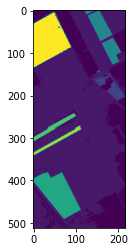

In [147]:
plt.imshow(Krs)

0.35021241359447003

In [153]:
cmK = confusion_matrix(gt,K)

In [154]:
rowsK, colsK = linear_sum_assignment(cmK,maximize=True)
cmK = cmK[rowsK,:]
cmK = cmK[:,rowsK]

In [156]:
print(accuracy_score(K, gt))
print(chisquare(cmK, axis = None))

0.35021241359447003
Power_divergenceResult(statistic=5630434.575046803, pvalue=0.0)


<table>
<thead>
<tr>
<th> </th>
<th>Accuracy Score</th>
<th>Accuracy Score</th>
<th>Chisquare</th>
</tr>
</thead>
<tbody>
<tr>
<th><font color='red'>UNCORRECTED</font></th>
<th><font color='red'>KMeans</font></th>
<th><font color='red'>0.068</font></th>
<th><font color='red'>3770881</font></th>
</tr>
<tr>
<th><font color='blue'>CORRECTED</font></th>
<th><font color='blue'>KMeans</font></th>
<th><font color='blue'>0.350</font></th>
<th><font color='blue'>5630434</font></th>
</tr>
</tbody>
</table>


##### Görüldüğü üzere, bunu uyguladığımızda hem Accuracy Score hem de Chisquare değerleri arttı. Ancak hala supervised metodlara yaklaşmış durumda değil.